In [48]:
import praw
import requests
import pandas as pd
from datetime import datetime, timedelta, date

CLIENT_ID = 'BP74HTk3g44RqYHGWnHNaA'
secret_key = 'CvyjdJVmQWuiMAaOqsIC1wCHv4RqlA'

auth = requests.auth.HTTPBasicAuth(CLIENT_ID,secret_key)
data = {
    'grant_type': 'password',
    'username': 'Datahydration',
    'password': 'Br3Yp$F93s-%!pb'
}
headers = {'User-Agent': 'redditapi/1'}
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)
token12 = res.json()['access_token']
headers = {**headers, **{'Authorization': f'bearer {token12}'}}


url = "https://oauth.reddit.com/r/wallstreetbets/"
query_url = url + "best"
best_posts = requests.get(query_url, headers=headers)
best_json = best_posts.json()
best_json

{'kind': 'Listing',
 'data': {'after': 't3_18fxw41',
  'dist': 27,
  'modhash': None,
  'geo_filter': None,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'wallstreetbets',
     'selftext': "Join [WSB's community voice chat](https://discord.com/channels/1037784194476163223/1083096862099263528), every day from 8:30am to whenever!\n\nCheck out our [Earnings Thread](https://reddit.com/r/wallstreetbets/about/sticky?num=2) and [Rules](https://www.reddit.com/r/wallstreetbets/wiki/contentguide).",
     'author_fullname': 't2_bd6q5',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'Daily Discussion Thread for December 11, 2023',
     'link_flair_richtext': [{'e': 'text', 't': 'Daily Discussion'}],
     'subreddit_name_prefixed': 'r/wallstreetbets',
     'hidden': False,
     'pwls': 7,
     'link_flair_css_class': 'daily',
     'downs': 0,
     'thumbnail_height': None,
     'top_awarded_type': No

In [49]:
import json
import requests
url = "https://yahoo-finance127.p.rapidapi.com/price/tsla"
headers = {
    "X-RapidAPI-Key": "11f7a923e1msh3c8c61e1bef42dcp1a3bf6jsn7810d3eb53c7",
    "X-RapidAPI-Host": "yahoo-finance127.p.rapidapi.com"
}
# response = requests.get(url, headers=headers)

# token1 = str(response.json())
#json.dumps(token1, indent=4, sort_keys=True)
yahoo_response = requests.get(url, headers=headers).json()
yahoo_response
# print(json.dumps(data, indent=4, sort_keys=True))

{'symbol': 'TSLA',
 'twoHundredDayAverageChangePercent': {'raw': 0.066248745, 'fmt': '6.62%'},
 'averageAnalystRating': '2.8 - Hold',
 'fiftyTwoWeekLowChangePercent': {'raw': 1.3561783, 'fmt': '135.62%'},
 'language': 'en-US',
 'earningsTimestampEnd': {'raw': 1706529600,
  'fmt': '2024-01-29',
  'longFmt': '2024-01-29T07:00'},
 'regularMarketDayRange': {'raw': '237.4512 - 243.441',
  'fmt': '237.45 - 243.44'},
 'epsForward': {'raw': 3.84, 'fmt': '3.84'},
 'regularMarketDayHigh': {'raw': 243.441, 'fmt': '243.44'},
 'twoHundredDayAverageChange': {'raw': 14.9045105, 'fmt': '14.90'},
 'askSize': {'raw': 11, 'fmt': '11', 'longFmt': '11'},
 'twoHundredDayAverage': {'raw': 224.978, 'fmt': '224.98'},
 'bookValue': {'raw': 16.818, 'fmt': '16.82'},
 'marketCap': {'raw': 762567262208,
  'fmt': '762.567B',
  'longFmt': '762,567,262,208'},
 'fiftyTwoWeekHighChange': {'raw': -59.4075, 'fmt': '-59.41'},
 'fiftyTwoWeekRange': {'raw': '101.81 - 299.29', 'fmt': '101.81 - 299.29'},
 'fiftyDayAverageChang

In [50]:
CLIENT_ID = 'BP74HTk3g44RqYHGWnHNaA'
secret_key = 'CvyjdJVmQWuiMAaOqsIC1wCHv4RqlA'
import requests
import praw
auth = requests.auth.HTTPBasicAuth(CLIENT_ID,secret_key)
data = {
    'grant_type': 'password',
    'username': 'Datahydration',
    'password': 'Br3Yp$F93s-%!pb'
}
headers = {'User-Agent': 'redditapi/1'}
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)
token12 = res.json()['access_token']
headers = {**headers, **{'Authorization': f'bearer {token12}'}}
headers
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

reddit_posts = []
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=secret_key,
    password = data['password'],
    user_agent=f"testscript by u/{data['username']}",
    username = data['username'],
)

#target_date = 1702285200

for submission in reddit.subreddit("wallstreetbets").search("Tesla", limit=100, sort="new"):
    date_utc = datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d')
    reddit_posts.append({"title": submission.title,
                         "upvotes": submission.score,
                         "num_comments": submission.num_comments,
                         "date_utc": date_utc})
    # if submission.created_utc >= target_date:
    #     break

reddit_df = pd.DataFrame(reddit_posts)
reddit_df.head()

,title,upvotes,num_comments,date_utc
0,HYSA holders are the fuel that will send us to...,1,2,2023-12-11
1,Why the CT is bullish and your feelings don’t ...,0,76,2023-12-11
2,JPOW looking at job data today,7,1,2023-12-08
3,Why NIO Inc is Undervalued,0,72,2023-12-08
4,Would this be considered classic Kramer move? ...,34,55,2023-12-07


In [51]:
# reddit_df['date_utc'] = reddit_df['date_utc'].apply(lambda x: datetime.utcfromtimestamp(x) if not isinstance(x, datetime) else x)

# # Now 'date_utc' contains human-readable date and time
# print(reddit_df['date_utc'])

In [52]:
reddit_df

,title,upvotes,num_comments,date_utc
0,HYSA holders are the fuel that will send us to...,1,2,2023-12-11
1,Why the CT is bullish and your feelings don’t ...,0,76,2023-12-11
2,JPOW looking at job data today,7,1,2023-12-08
3,Why NIO Inc is Undervalued,0,72,2023-12-08
4,Would this be considered classic Kramer move? ...,34,55,2023-12-07
...,...,...,...,...
95,$12k on Tesla calls,477,452,2023-10-18
96,Tesla reports release after market today,60,52,2023-10-18
97,Feeling good about this one ☝️,54,86,2023-10-17
98,Wont be sleeping tonight,646,418,2023-10-16


In [53]:
new_reddit_df_mean_upvotes_100 = reddit_df['upvotes'].mean()
new_reddit_df_mean_upvotes_100

857.38

In [54]:
yahoo_finance = []

yahoo_finance.append({"Symbol": yahoo_response["symbol"],
                        "Day_Range_raw": yahoo_response["regularMarketDayRange"]["raw"],
                        "Market_Price": yahoo_response["regularMarketPrice"]["raw"],
                        "Company_Name": yahoo_response["longName"]})

yahoo_finance_df = pd.DataFrame(yahoo_finance)
yahoo_finance_df.head()


,Symbol,Day_Range_raw,Market_Price,Company_Name
0,TSLA,237.4512 - 243.441,239.8825,"Tesla, Inc."


In [55]:
from datetime import datetime, timedelta, date
 
specific_date = date(2023, 12, 11)
start_date = specific_date - timedelta(days=7)
print(specific_date)
print(start_date)

2023-12-11
2023-12-04


In [56]:
import requests

url = "https://yahoo-finance127.p.rapidapi.com/historic/tsla/1d/100d"

headers = {
	"X-RapidAPI-Key": "11f7a923e1msh3c8c61e1bef42dcp1a3bf6jsn7810d3eb53c7",
	"X-RapidAPI-Host": "yahoo-finance127.p.rapidapi.com"
}

yahoo_response2 = requests.get(url, headers=headers).json()
yahoo_response2

{'meta': {'currency': 'USD',
  'symbol': 'TSLA',
  'exchangeName': 'NMS',
  'instrumentType': 'EQUITY',
  'firstTradeDate': 1277818200,
  'regularMarketTime': 1702322693,
  'gmtoffset': -18000,
  'timezone': 'EST',
  'exchangeTimezoneName': 'America/New_York',
  'regularMarketPrice': 239.845,
  'chartPreviousClose': 262.9,
  'priceHint': 2,
  'currentTradingPeriod': {'pre': {'timezone': 'EST',
    'start': 1702285200,
    'end': 1702305000,
    'gmtoffset': -18000},
   'regular': {'timezone': 'EST',
    'start': 1702305000,
    'end': 1702328400,
    'gmtoffset': -18000},
   'post': {'timezone': 'EST',
    'start': 1702328400,
    'end': 1702342800,
    'gmtoffset': -18000}},
  'dataGranularity': '1d',
  'range': '100d',
  'validRanges': ['1d',
   '5d',
   '1mo',
   '3mo',
   '6mo',
   '1y',
   '2y',
   '5y',
   '10y',
   'ytd',
   'max']},
 'timestamp': [1689946200,
  1690205400,
  1690291800,
  1690378200,
  1690464600,
  1690551000,
  1690810200,
  1690896600,
  1690983000,
  169106

In [75]:
yahoo_finance3 = []

yahoo_finance3.append({"Symbol": yahoo_response2['meta']["symbol"],
                        "Market_Price": yahoo_response2['meta']["regularMarketPrice"],
                        "Date": yahoo_response2["timestamp"],
                        "Open": yahoo_response2['indicators']['quote'][0]['open']})

yahoo_finance_df3 = pd.DataFrame(yahoo_finance3)
yahoo_finance_df3.head()


,Symbol,Market_Price,Date,Open
0,TSLA,239.845,"[1689946200, 1690205400, 1690291800, 169037820...","[268, 255.85000610351562, 272.3800048828125, 2..."


In [76]:
date_yahoo = yahoo_finance_df3['Date'].tolist()
new_df_yahoo_date = pd.DataFrame(date_yahoo)
#yahoo1 = new_df_yahoo.transpose()
yeah1 = new_df_yahoo_date.astype(int)
yeah1 = yeah1.transpose()
yeah1.columns = ['Date']
date_utc = yeah1['Date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
yeah1['date_utc'] = date_utc
yeah1


,Date,date_utc
0,1689946200,2023-07-21
1,1690205400,2023-07-24
2,1690291800,2023-07-25
3,1690378200,2023-07-26
4,1690464600,2023-07-27
...,...,...
95,1701786600,2023-12-05
96,1701873000,2023-12-06
97,1701959400,2023-12-07
98,1702045800,2023-12-08


In [77]:
yahoo_finance2 = []

yahoo_finance2.append({"Symbol": yahoo_response2['meta']["symbol"],
                        "Valid_ranges": yahoo_response2["meta"]["validRanges"][1],
                        "Open": yahoo_response2['indicators']['quote'][0]['open']})
#"Timestamp": yahoo_finance2['meta']['firstTradeDate'][1]

yahoo_finance_df2 = pd.DataFrame(yahoo_finance2)
yahoo_finance_df2.head()

open_15d_yahoo = yahoo_finance_df2['Open'].tolist()
new_df_yahoo = pd.DataFrame(open_15d_yahoo)
#yahoo1 = new_df_yahoo.transpose()
yeahoo2 = new_df_yahoo.astype(int)
yeahoo2 = yeahoo2.transpose()
yeahoo2.columns = ['Open']
yeahoo2


,Open
0,268
1,255
2,272
3,263
4,268
...,...
95,233
96,242
97,241
98,240


In [81]:
df100 = pd.concat([yeahoo2['Open'],yeah1['date_utc']], axis='columns')
df100

,Open,date_utc
0,268,2023-07-21
1,255,2023-07-24
2,272,2023-07-25
3,263,2023-07-26
4,268,2023-07-27
...,...,...
95,233,2023-12-05
96,242,2023-12-06
97,241,2023-12-07
98,240,2023-12-08


In [82]:
merged_df = pd.merge(reddit_df,df100)
merged_df

,title,upvotes,num_comments,date_utc,Open
0,HYSA holders are the fuel that will send us to...,1,2,2023-12-11,242
1,Why the CT is bullish and your feelings don’t ...,0,76,2023-12-11,242
2,JPOW looking at job data today,7,1,2023-12-08,240
3,Why NIO Inc is Undervalued,0,72,2023-12-08,240
4,Would this be considered classic Kramer move? ...,34,55,2023-12-07,241
...,...,...,...,...,...
86,How are those Tesla calls going today?,44,44,2023-10-18,252
87,$12k on Tesla calls,477,452,2023-10-18,252
88,Tesla reports release after market today,60,52,2023-10-18,252
89,Feeling good about this one ☝️,54,86,2023-10-17,250


0      74.435512
1      74.298360
2      75.258426
3      74.298360
4      78.961538
         ...    
95    139.720008
96     82.527498
97     81.704584
98    162.898747
99     99.671535
Name: upvotes, Length: 100, dtype: float64
0.13715230153237543
y = 0.14x +74.3
The r-value is: 0.6745966073751121


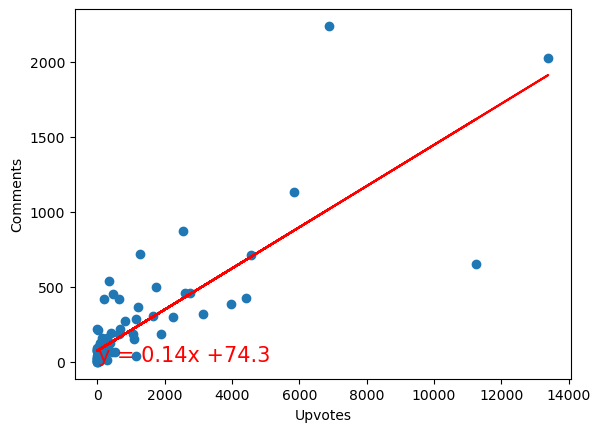

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = reddit_df['upvotes']
y_values = reddit_df['num_comments']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Upvotes')
plt.ylabel('Comments')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0      74.538796
1      74.401266
2      75.363976
3      74.401266
4      79.077284
         ...    
86     80.452583
87    140.003039
88     82.653062
89     81.827882
90    163.245596
Name: upvotes, Length: 91, dtype: float64
0.13752992263329866
y = 0.14x +74.4
The r-value is: 0.6826595765083021


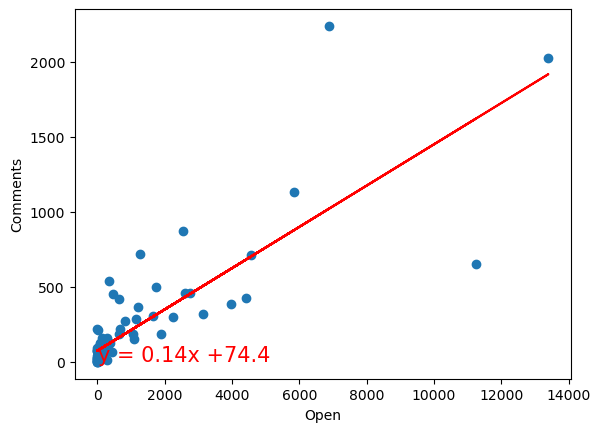

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['upvotes']
y_values = merged_df['num_comments']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Open')
plt.ylabel('Comments')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     -100.411140
1      249.448683
2     -105.138976
3      230.537341
4      150.164138
         ...     
86      98.157948
87    2027.114811
88     135.980632
89     296.727037
90    1866.368406
Name: num_comments, Length: 84, dtype: float64
4.727835447234318
y = 4.73x +-109.87
The r-value is: 0.5445497642841322


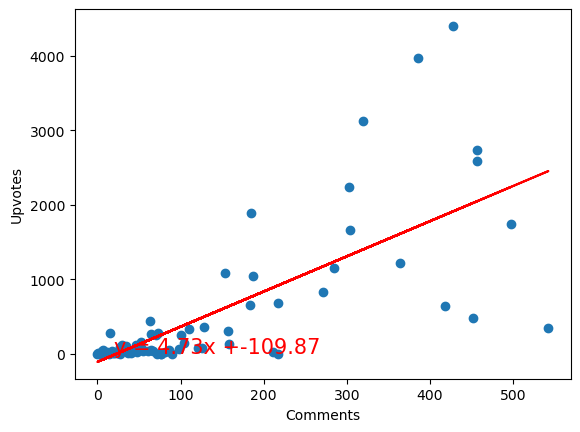

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['num_comments']
y_values = merged_df['upvotes']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Comments')
plt.ylabel('Upvotes')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     926.592465
1     926.592465
2     924.368461
3     924.368461
4     925.480463
         ...    
86    937.712485
87    937.712485
88    937.712485
89    935.488481
90    935.488481
Name: Open, Length: 91, dtype: float64
1.1120019915822121
y = 1.11x +657.49
The r-value is: 4.9883339823954326e-05


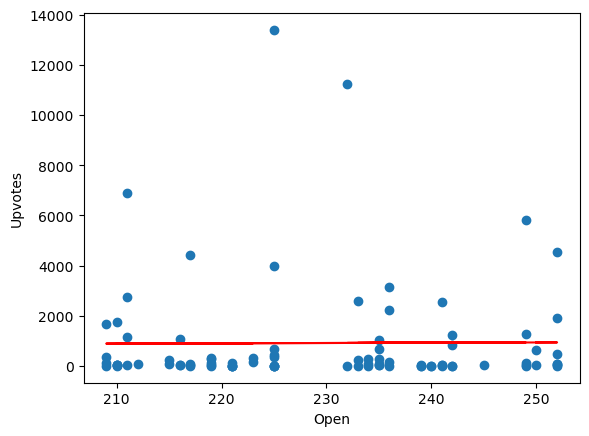

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['Open']
y_values = merged_df['upvotes']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Open')
plt.ylabel('Upvotes')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     201.757785
1     201.757785
2     201.464200
3     201.464200
4     201.610993
         ...    
86    203.225713
87    203.225713
88    203.225713
89    202.932128
90    202.932128
Name: Open, Length: 91, dtype: float64
0.14679276580979628
y = 0.15x +166.23
The r-value is: 3.1373537440080394e-05


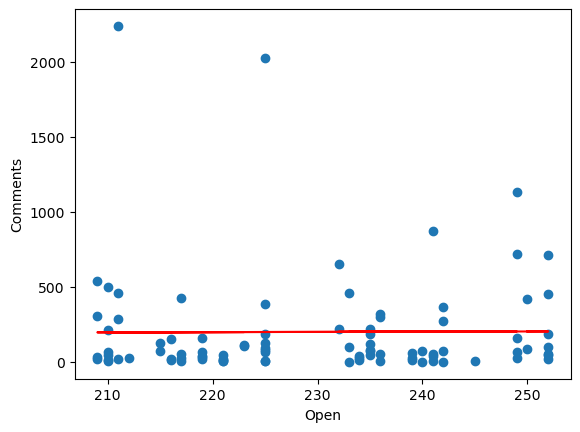

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['Open']
y_values = merged_df['num_comments']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Open')
plt.ylabel('Comments')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [98]:
#Looking for outliers
import pandas as pd
import numpy as np
from scipy import stats

merged_df = merged_df[(np.abs(stats.zscore(merged_df['upvotes'])) < 3)]
merged_df = merged_df[(np.abs(stats.zscore(merged_df['num_comments'])) < 3)]
merged_df


,title,upvotes,num_comments,date_utc,Open
0,HYSA holders are the fuel that will send us to...,1,2,2023-12-11,242
1,Why the CT is bullish and your feelings don’t ...,0,76,2023-12-11,242
2,JPOW looking at job data today,7,1,2023-12-08,240
3,Why NIO Inc is Undervalued,0,72,2023-12-08,240
4,Would this be considered classic Kramer move? ...,34,55,2023-12-07,241
...,...,...,...,...,...
86,How are those Tesla calls going today?,44,44,2023-10-18,252
87,$12k on Tesla calls,477,452,2023-10-18,252
88,Tesla reports release after market today,60,52,2023-10-18,252
89,Feeling good about this one ☝️,54,86,2023-10-17,250


0     112.193059
1     112.193059
2     112.945358
3     112.945358
4     112.569208
         ...    
86    108.431561
87    108.431561
88    108.431561
89    109.183861
90    109.183861
Name: Open, Length: 84, dtype: float64
-0.3761497165596729
y = -0.38x +203.22
The r-value is: 0.001350226738237198


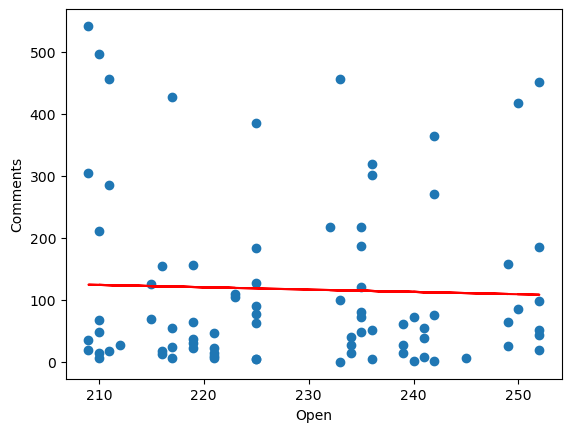

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['Open']
y_values = merged_df['num_comments']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Open')
plt.ylabel('Comments')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     378.653330
1     378.653330
2     388.519137
3     388.519137
4     383.586233
         ...    
86    329.324295
87    329.324295
88    329.324295
89    339.190102
90    339.190102
Name: Open, Length: 84, dtype: float64
-4.9329034801216345
y = -4.93x +1572.42
The r-value is: 0.005657223430417379


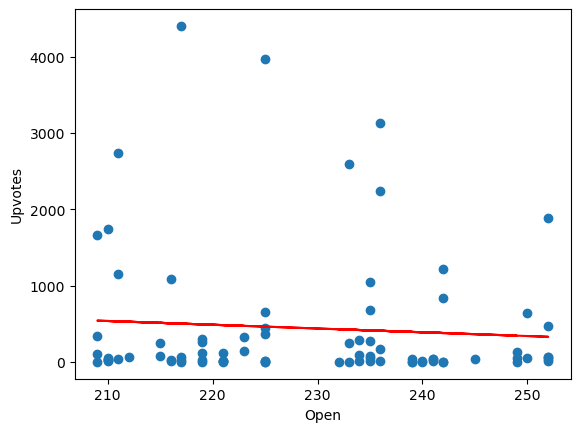

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['Open']
y_values = merged_df['upvotes']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Open')
plt.ylabel('Upvotes')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

0     -100.411140
1      249.448683
2     -105.138976
3      230.537341
4      150.164138
         ...     
86      98.157948
87    2027.114811
88     135.980632
89     296.727037
90    1866.368406
Name: num_comments, Length: 84, dtype: float64
4.727835447234318
y = 4.73x +-109.87
The r-value is: 0.5445497642841322


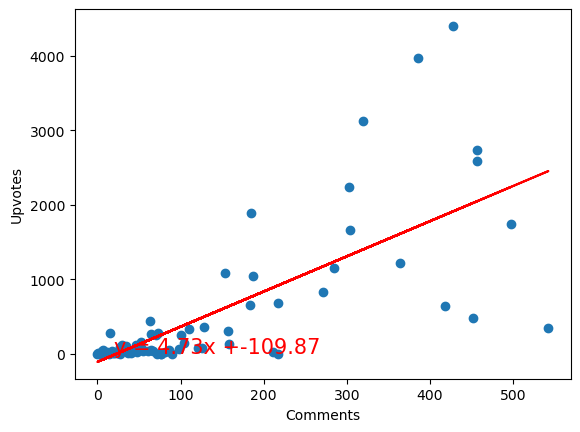

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Linear regression on Reddit upvotes and comments
x_values = merged_df['num_comments']
y_values = merged_df['upvotes']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
print(slope)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Comments')
plt.ylabel('Upvotes')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()